# Z Scoring to Baseline

In [36]:
%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import tdt
import os

import warnings
warnings.simplefilter("ignore")


**Defining data directory, obtaining the correct data.** 

The trial list is a 60 dimensional array. 
There are 60 trials, and for each trial there is an array filled with data for each of 128 channels. 

*The length of the data is different for some channels.* 

- trials_list`[0]` gives the data for every channel for the first trial 
- trials_list`[0][0]` gives the data for channel 0 for the first trial 
- trials_list`[0][0][0]` gives the first data point for channel 0 for the first trial

In [2]:
data_directory = '/Users/vanessagutierrez/data/Rat/RVG13/RVG13_B04'

In [3]:
stream = 'Wave'
stim_delay = 0.25 #sec

In [39]:
tdt_data = tdt.read_block(data_directory)
fs = tdt_data['streams']['Wave']['fs']
# stimulus_onset = tdt.epoc_filter(tdt_data, 'mark', t = [-.1, 0])
# stimulus_onset

TypeError: read_block() takes 1 positional argument but 2 were given

In [5]:
animal_block = tdt_data.info.blockname
animal_block

'RVG13_B04'

In [6]:
# makes a 'Figures' folder in the Rat directory
savepic = '/Users/vanessagutierrez/Desktop/practice_TDT/{}/Figures'.format(animal_block)
if not os.path.exists(savepic):
    os.mkdir(savepic)
if os.path.exists(savepic):
    print("Path already exists")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vanessagutierrez/Desktop/practice_TDT/RVG13_B04/Figures'

In [7]:
all_data = tdt.epoc_filter(tdt_data, 'mark').streams.Wave['filtered']

In [8]:
chs_ordered = [
       81, 83, 85, 87, 89, 91, 93, 95, 97, 105, 98, 106, 114, 122, 113, 121,
       82, 84, 86, 88, 90, 92, 94, 96, 99, 107, 100, 108, 116, 124, 115, 123,
       66, 68, 70, 72, 74, 76, 78, 80, 101, 109, 102, 110, 118, 126, 117, 125,
       65, 67, 69, 71, 73, 75, 77, 79, 103, 111, 104, 112, 120, 128, 119, 127,
       63, 61, 59, 57, 55, 53, 51, 49, 25, 17, 26, 18, 10, 2, 9, 1,
       64, 62, 60, 58, 56, 54, 52, 50, 27, 19, 28, 20, 12, 4, 11, 3,
       48, 46, 44, 42, 40, 38, 36, 34, 29, 21, 30, 22, 14, 6, 13, 5,
       47, 45, 43, 41, 39, 37, 35, 33, 31, 23, 32, 24, 16, 8, 15, 7
       ]

## Functions

In [9]:
def all_data_one_channel(data_for_trial_list, channel, tmax = 6000):
    
    """inputs: 
        data for trial list(list)
            list with data with an array for each trial that contains subarrays for each channel
        channel(int)
             channel you want data for 
        returns: 
            array with dimensions (60, tmax) that contains the data for one channel"""
    
    data_for_channel = []
    channel = channel - 1 #subtract 1 because the array is 0 indexed but the channels are not 
    
    for trial in range(len(data_for_trial_list)):
        one_trial = data_for_trial_list[trial][channel]
        data_for_channel.append(one_trial[:tmax])
        
    return np.array(data_for_channel)

In [10]:
def stimulus_onset_one_channel(data_for_trial_list, channel, onset_start, onset_stop):
    
    """inputs: 
        data for trial list(list)
            list with data with an array for each trial that contains subarrays for each channel
        channel(int)
             channel you want data for 
        onset_start (int)
            starting period of the stimulus onset
        onset_stop
            right before stimulus occurs 
            
        returns: 
            array with the data during the onset period for all trials"""
    
    onset_for_channel = []
    channel = channel - 1 #subtract 1 because the array is 0 indexed but the channels are not 
    onset_start = int(onset_start)
    onset_stop = int(onset_stop)
    
    for trial in range(len(data_for_trial_list)):
        one_trial = data_for_trial_list[trial][channel]
        onset_for_channel.append(one_trial[onset_start:onset_stop])
        
    return np.array(onset_for_channel)

In [11]:
def zscore_from_baseline(data_for_trial_list, channel, onset_start, onset_stop):
    
    onset_data = stimulus_onset_one_channel(data_for_trial_list, channel, onset_start, onset_stop)
    
    average_onset = np.average(onset_data)
    standard_dev = np.std(onset_data)
    
    all_data_for_channel = all_data_one_channel(data_for_trial_list, channel) #returns data for one channel for all trials
    zscored = (all_data_for_channel - average_onset)/(standard_dev)
        
    return zscored

In [12]:
def get_average_zscore(data_for_trial_list, channel, onset_start, onset_stop, tmax = 6000):
 
    data_for_channel = zscore_from_baseline(data_for_trial_list, channel, onset_start, onset_stop)
    
    different_format = np.transpose(data_for_channel) #array shape(6000, 60)

    
#     trial_mat = np.zeros((tmax, len(data_for_channel))) #array shape(6000, 60)

    
#     for timepoint in range(len(different_format)): # for each timepoint in all of 60 trials
#         sub_trial = different_format[timepoint] #this gives us the data for the first timepoint across 60 trials when timepoint = 0

#         trial_mat[timepoint, :] = sub_trial
    
    mean_trial = np.mean(different_format, axis = 1)
    
    return mean_trial #this should be array of size 6000


In [15]:
def get_std(data_for_trial_list, channel, onset_start, onset_stop, tmax = 6000):
    
    data_for_channel = zscore_from_baseline(all_data, channel, onset_start, onset_stop)
    
    different_format = np.transpose(data_for_channel)
    
    std_trial = np.std(different_format, axis=1)
    
    return std_trial

In [30]:
def plot_zscores(data_for_trial_list, chs, onset_start, onset_stop, 
                 tmax = 6000, height = 8, width = 16): 
    for channel in np.arange(len(chs)):
        if channel >= height*width:
            return
        plt.subplot(height, width, channel + 1)
        
        correct_channel = chs[channel]
        data_for_channel_zscored = zscore_from_baseline(data_for_trial_list, correct_channel, onset_start, onset_stop)
        average_for_channel = get_average_zscore(data_for_trial_list, correct_channel, onset_start, onset_stop)
        std_for_channel = get_std(data_for_trial_list, correct_channel, onset_start, onset_stop)
        
        plt.plot(average_for_channel, color = 'k', linewidth= 2, zorder = 9)
        plt.plot(average_for_channel + std_for_channel, 'w', average_for_channel - std_for_channel, 'w', linewidth=.8, zorder=10)
        plt.title('Channel ' + str(correct_channel), fontsize= 7)
        plt.vlines(.25*fs, ymin = min(data_for_channel_zscored.flatten()), ymax = max(data_for_channel_zscored.flatten()), color = 'darksalmon', zorder = 10)
        plt.fill_between(range(6000), average_for_channel - std_for_channel, average_for_channel + std_for_channel, color='lightgray', alpha = 0.5)
#         for i in np.arange(len(data_for_channel_zscored)):
#             plt.plot(data_for_channel_zscored[i], color = (.85,.85,.85), linewidth = 0.5)
        
        plt.xlim(2000, 5000)
        plt.xticks([2000, 3000, 5000, 5000],[-100, 0, 100, 200])
        plt.xticks(fontsize=12)
        plt.ylim(-5, 5)
        plt.yticks(fontsize=12)
        plt.axhline(y=0, color='darkgrey', linestyle='--', zorder = 1)
        
    plt.suptitle('{} Z-Scores Across Channels'.format(animal_block), fontsize=60, y=1)

<IPython.core.display.Javascript object>


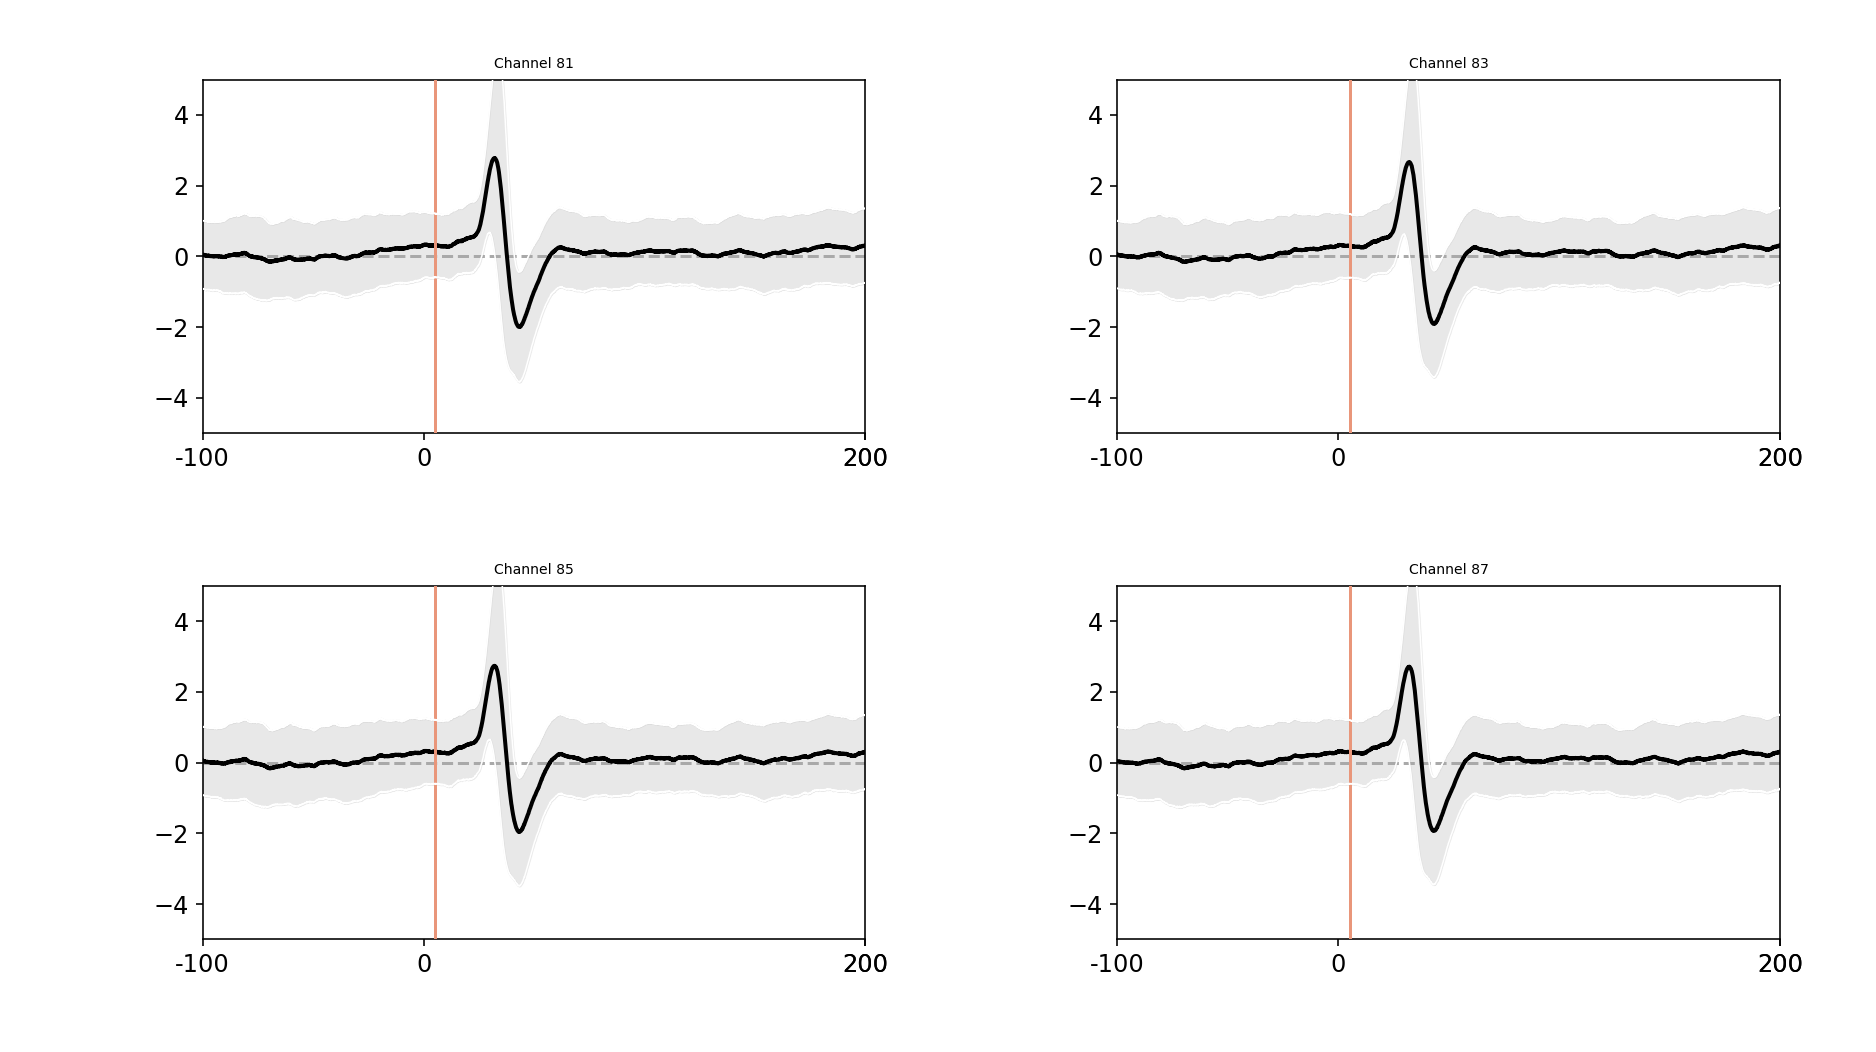

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [37]:
plot_zscores(all_data, chs_ordered, .05*fs, .15*fs, height = 2, width = 2)
plt.tight_layout()
plt.figure

## Saving the Figure

In [31]:
f2 = plt.figure()
f2.set_size_inches(70, 35)
plot_zscores(all_data, chs_ordered, .05*fs, .15*fs)
plt.tight_layout()
# f2.savefig("{}/{}_ZScore_Across_Channels.png".format(savepic, animal_block), dpi=300) 
f2.savefig("/Users/vanessagutierrez/Desktop/RVG13_B04_ZScore_Across_Channels.png", dpi=300) 
# can change 'savepic' to 'data_directory' if you want plots to be saved in same directory folder

<IPython.core.display.Javascript object>

In [147]:
# unfiltered_data = tdt_data.streams.Wave.data
# unfiltered_data.shape

In [148]:
# unfiltered_data[0,1144831]

In [149]:
# onset_start = int(25.1*fs)
# onset_stop = int(25.2*fs)

# baseline = []

# for channel in range(len(unfiltered_data)):
#     new_data = unfiltered_data[channel, onset_start:onset_stop]
#     baseline.append(new_data)

In [150]:
# baseline[0]

In [363]:
average_maybe = get_average_array(all_data, 94, .2*fs, .25*fs)

In [364]:
average_maybe.shape

(6000,)

<IPython.core.display.Javascript object>


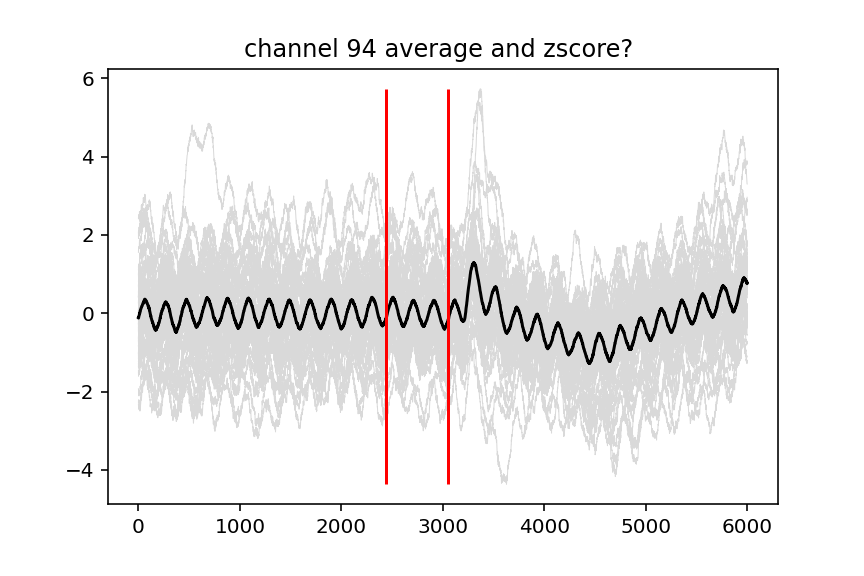

Text(0.5, 1.0, 'channel 94 average and zscore? ')

In [365]:
plt.plot(average_maybe, color = 'k', zorder = 9)
channel_94 = all_data_one_channel(all_data, 94)
zscored94 = zscore_from_baseline(all_data, 94, .2*fs, .25*fs)
for i in np.arange(len(zscored94)):
    plt.plot(zscored94[i], color = (.85,.85,.85), linewidth = 0.5)
plt.vlines([.2*fs, .25*fs], ymin = min(zscored94.flatten()), ymax = max(zscored94.flatten()), color = 'r', zorder = 10)
plt.title('channel 94 average and zscore')

In [298]:
array_with_numbers = np.array([[3,4], [5,6]]) #this represents just the piece of data to get baseline statistics

In [299]:
flattened = array_with_numbers.flatten() #this makes sure alll of the data is considered 

In [300]:
flattened

array([3, 4, 5, 6])

In [303]:
#get our statistics 
avg = np.average(flattened)
std = np.std(flattened)

In [296]:
test_array = np.array([[1, 2, 3, 4], [5, 6, 7, 8]]) #this is all of our data

In [304]:
#this is the zscored data
z_scored = (test_array - avg)/std

In [305]:
z_scored

array([[-3.13049517, -2.23606798, -1.34164079, -0.4472136 ],
       [ 0.4472136 ,  1.34164079,  2.23606798,  3.13049517]])

In [292]:
(test_array - 2)/5

array([[-0.2,  0. ],
       [ 0.2,  0.4]])

In [260]:
tester = zscore_from_baseline(all_data, 97, stimulus_onset, stimulus)

In [261]:
tester.shape

(60, 6000)

In [237]:
onset_channel_94 = stimulus_onset_one_channel(all_data, 97, stimulus_onset, stimulus)

In [246]:
flattened = onset_channel_94.flatten()

In [283]:
channel_1 = all_data_one_channel(all_data, 94)

In [220]:
channel_96 = all_data_one_channel(all_data, 97)

In [250]:
channel_96.shape

(60, 6000)

In [275]:
stimulus = .25*fs

In [276]:
stimulus_onset = .2*fs

In [215]:
stimulus

3051.7578125

<IPython.core.display.Javascript object>


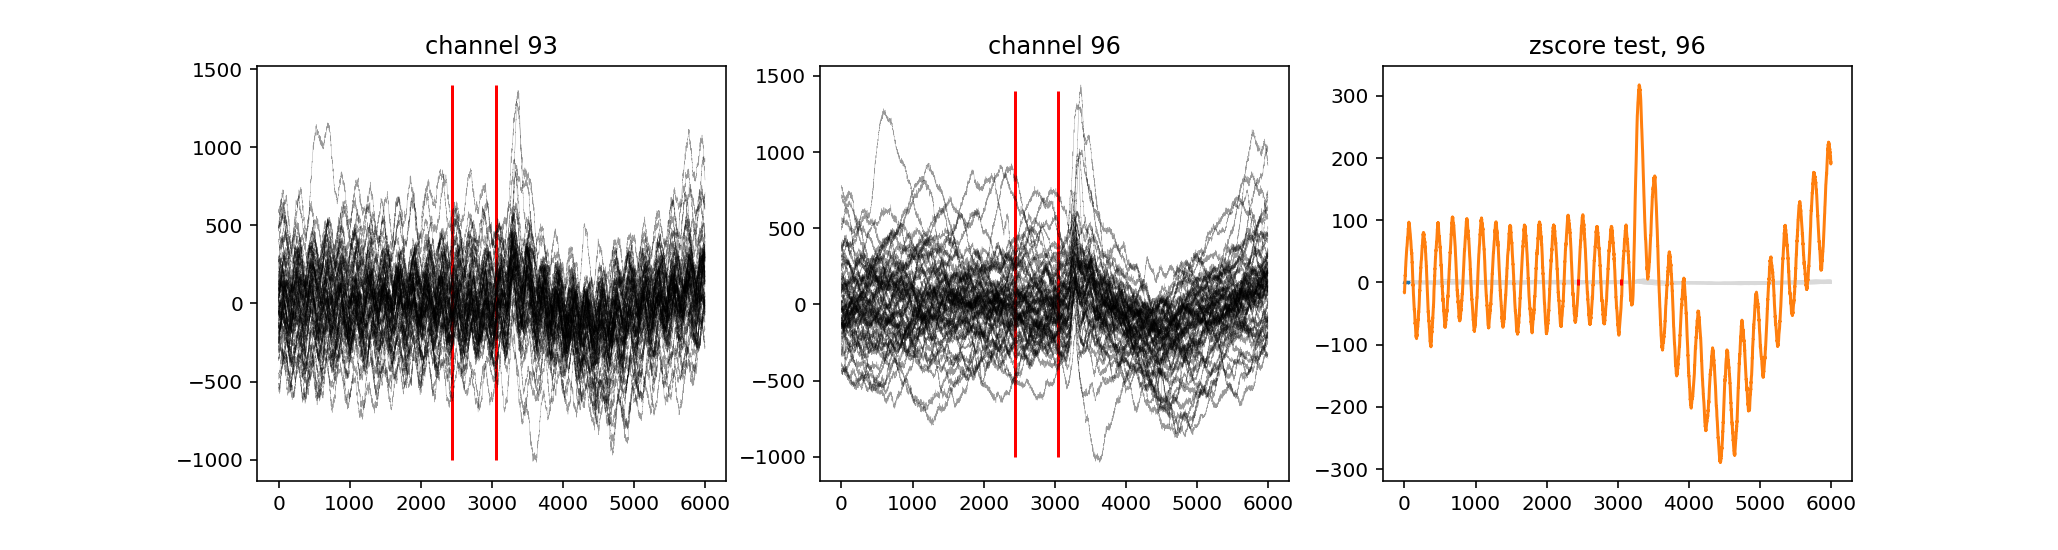

Text(0.5, 1.0, 'zscore test, 96')

In [317]:
plt.subplot(1, 3, 1)
for i in np.arange(len(channel_1)):
    plt.plot(channel_1[i], color = 'k', linewidth = 0.2, alpha = .4)
plt.vlines([.2*fs, .25*fs], ymin = -1000, ymax = 1400, color = 'r', zorder = 1)
plt.title('channel 93')

plt.subplot(1, 3, 2)
for i in np.arange(len(channel_1)):
    plt.plot(channel_96[i], color = 'k', linewidth = 0.2, alpha = .4)
plt.vlines([.2*fs, .25*fs], ymin = -1000, ymax = 1400, color = 'r', zorder = 1)
plt.title('channel 96')

plt.subplot(1, 3, 3)
for i in np.arange(len(tester)):
    plt.plot(tester[i], color = (.85,.85,.85), linewidth = 0.5)
plt.vlines([.2*fs, .25*fs], ymin = min(tester.flatten()), ymax = max(tester.flatten()), color = 'r', zorder = 10)
plt.title('zscore test, 96')


<IPython.core.display.Javascript object>


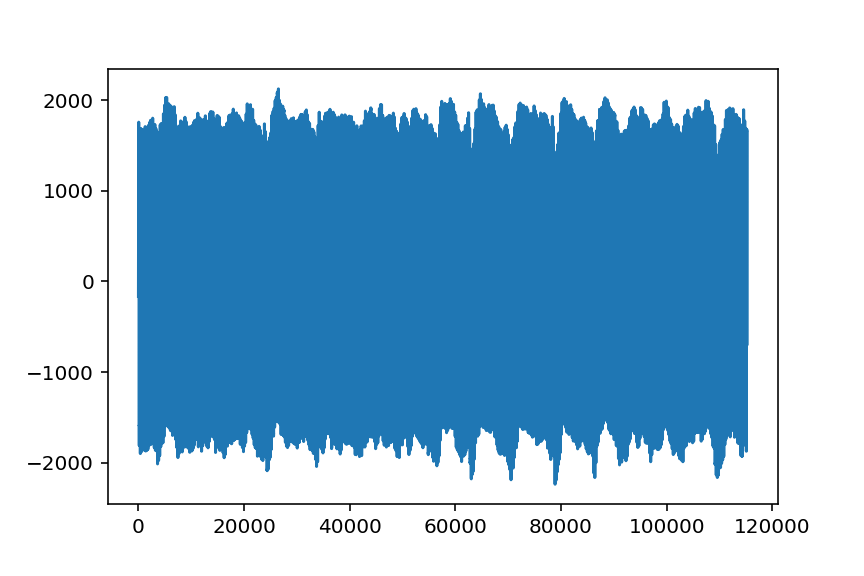

In [187]:
plt.plot(channel_1[59])

In [168]:
#for trial list, index is the channel id  
for tidx, trial in enumerate(all_data):
    print(tidx, trial)

0 [[-1089 -1031 -1008 ...  -995 -1047 -1086]
 [ -413  -395  -403 ...    15     7    -7]
 [-1097 -1030 -1003 ...  -858  -915  -956]
 ...
 [ -886  -843  -765 ...  -963  -987  -993]
 [ -964  -917  -891 ... -1031 -1079 -1096]
 [-1121 -1068 -1043 ...  -973 -1030 -1040]]
1 [[-1091 -1111 -1147 ... -1168 -1218 -1260]
 [   -5    -3   -13 ...    68    55    44]
 [ -957  -972 -1014 ...  -986 -1037 -1086]
 ...
 [-1029 -1049 -1059 ...  -584  -638  -684]
 [-1104 -1121 -1150 ... -1176 -1227 -1246]
 [-1054 -1068 -1107 ... -1028 -1081 -1107]]
2 [[-1284 -1284 -1282 ... -1189 -1242 -1259]
 [   45    63    71 ...   184   168   174]
 [-1105 -1103 -1109 ... -1051 -1105 -1122]
 ...
 [ -713  -731  -746 ... -1313 -1353 -1355]
 [-1244 -1242 -1263 ... -1301 -1339 -1350]
 [-1118 -1121 -1149 ... -1286 -1331 -1346]]
3 [[-1259 -1308 -1321 ... -1501 -1509 -1539]
 [  188   159   167 ...   309   332   330]
 [-1127 -1178 -1183 ... -1334 -1341 -1368]
 ...
 [-1362 -1368 -1312 ... -1129 -1153 -1162]
 [-1366 -1381 -1349 ...

In [97]:
onset_data = stimulus_onset.streams.Wave.data

In [98]:
onset_data.shape

(128, 1144832)

In [149]:
len(onset_data[0])

1144832

<IPython.core.display.Javascript object>


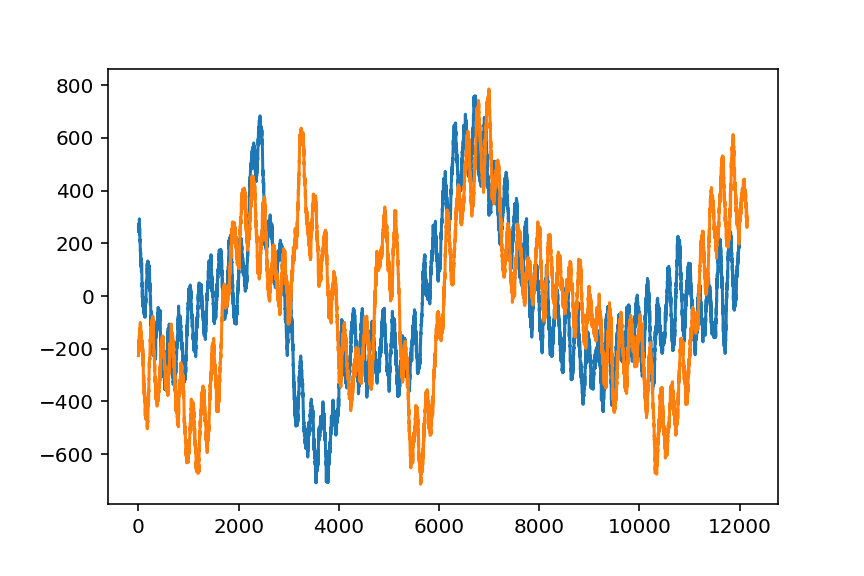

In [91]:
plt.plot(onset_data[93][0:12000])

<IPython.core.display.Javascript object>


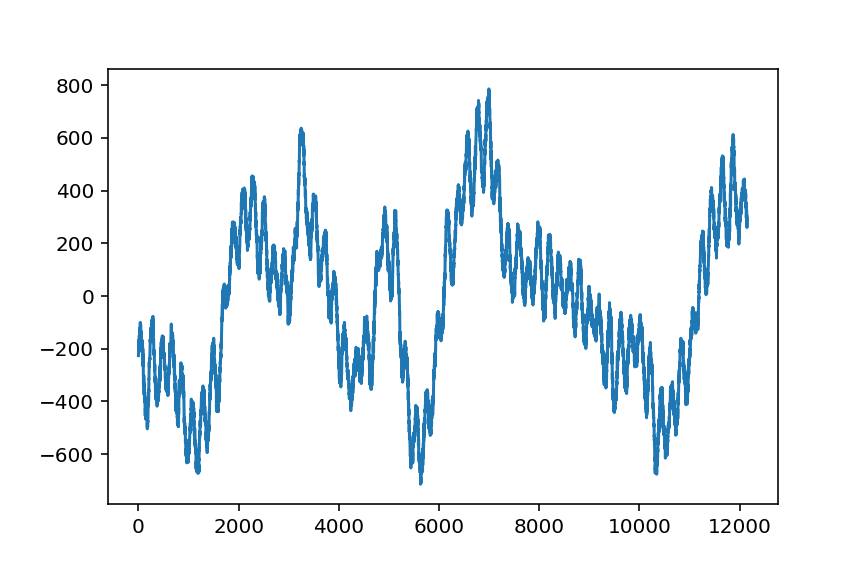

In [104]:
plt.plot(trials_list[0][93])

<IPython.core.display.Javascript object>


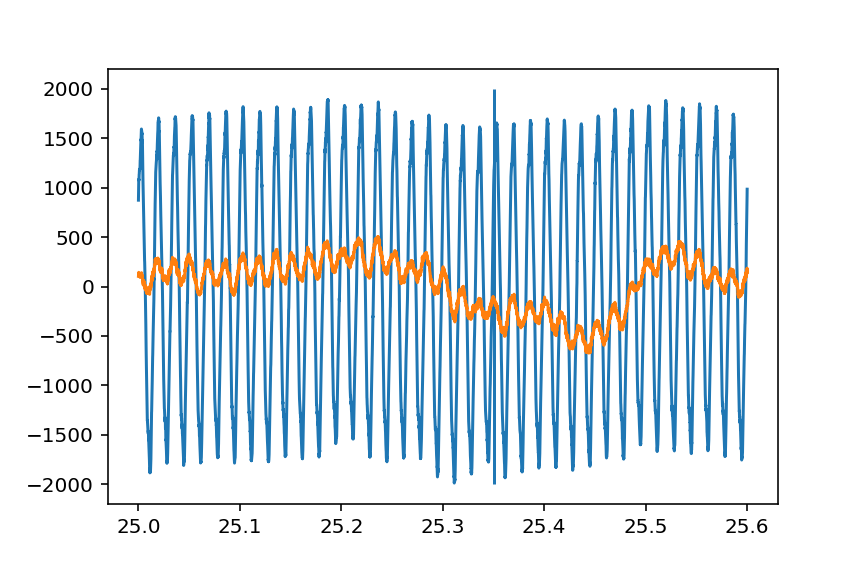

In [147]:
#hard coded, 24 to 25 seconds 
num_samples = len(tdt_data.streams.Wave.data[0])
wave1_time = np.linspace(1, num_samples, num_samples)/tdt_data.streams["Wave"].fs
t1= int(25.0*fs)
t2= int(25.6*fs)

plt.plot(wave1_time[t1:t2], tdt_data.streams.Wave.data[0, t1:t2])
plt.plot(wave1_time[t1:t2], tdt_data.streams.Wave.data[93, t1:t2])
plt.vlines(25.35, ymin = -2000, ymax =2000)

In [112]:
tdt_data.streams.Wave.data

array([[1392, 1407, 1374, ..., -604, -658, -691],
       [ 111,  119,  123, ..., -131, -117, -109],
       [1249, 1263, 1244, ..., -497, -545, -579],
       ...,
       [1896, 1878, 1905, ...,   62,  -41, -190],
       [1401, 1384, 1400, ..., -621, -631, -713],
       [1507, 1499, 1514, ..., -406, -435, -512]], dtype=int16)

In [40]:
tdt_trials = tdt.epoc_filter(tdt_data, 'mark')
trials_list = tdt_trials['streams']['Wave']['filtered']

In [41]:
stimulus_onset = tdt.epoc_filter(tdt_data, 'mark', t = [25.25, 25.35])

In [42]:
stimulus_onset_all = stimulus_onset['streams']

In [43]:
stimulus_onset_all = stimulus_onset['streams']['Wave'].data

In [44]:
stimulus_onset_all.shape

(128, 1144832)